In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv("C:/bank-full.csv")

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank=pd.get_dummies(bank,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'],drop_first=True)

In [5]:
bank.shape

(45211, 43)

In [6]:
bank.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


In [7]:
# Dividing data into input and output variables
X=bank.iloc[:,:41]
Y=bank.iloc[:,42]

In [8]:
#Logistic regression and fit the model
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Predict for X dataset
y_pred = classifier.predict(X)

In [10]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [11]:
y_pred_df=pd.DataFrame({'actual':Y,
                       'predicted_prob': y_pred})

In [12]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [13]:
#Create Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)

In [14]:
confusion_matrix

array([[39152,   770],
       [ 4165,  1124]], dtype=int64)

In [15]:
#Classification report
from sklearn.metrics import classification_report
classification_report=classification_report(Y,y_pred)

In [16]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [17]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(Y,y_pred)
accuracy_score

0.8908451483046161

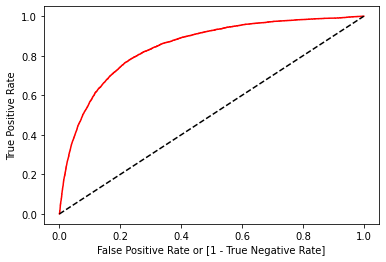

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)
auc



import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()